## IBS-2 Project by Group-9 Batch-B

##### Team Members:

1) Suriya K P - CB.EN.U4AIE22164
2) I.V.Srichandra - CB.EN.U4AIE22165
3) Durai Singh - CB.EN.U4AIE22167

### Predicting Viral Host based on Metagenomic Features

#### Dataset

The virus dataset consists of 7,362 entries, each detailing various aspects of viral genomics and taxonomy. It includes information on virus names, taxonomic groups, and biological sample identifiers, although the latter is often missing. The dataset covers 4,893 unique virus names classified into 17 distinct taxonomic groups. Each entry has a unique assembly accession number, indicating a specific version of the genome assembly, and all entries are marked as "Complete." Genome sizes and GC content vary among the viruses. The dataset also provides information about the host organisms, which include bacteria, fungi, plants, and vertebrates, reflecting the diverse range of virus-host interactions. Additionally, it lists the number of coding sequences (CDS) per virus and includes FTP links to GenBank and RefSeq entries, offering access to detailed genomic data. While some columns like "BioSample" and "Neighbors" have many missing values, most columns are well-populated, making this dataset a rich resource for virologists and researchers studying viral diversity and genomics.


In [1]:
import numpy as np 
import pandas as pd 

# Load the data
virus_csv_file = 'viruses.csv'
viruses_df = pd.read_csv(virus_csv_file)
viruses_df.head(5)



,#Organism Name,Organism Groups,BioSample,BioProject,Assembly,Level,Size(Mb),GC%,Replicons,Host,CDS,Neighbors,Release Date,GenBank FTP,RefSeq FTP,Replicons.1
0,Hamiltonella virus APSE1,"Viruses;dsDNA viruses, no RNA stage;Podoviridae",NaN,PRJNA14047,GCA_000837745.1,Complete,0.036524,43.900,Unknown:NC_000935.1/AF157835.1,bacteria,54,NaN,1999-10-26T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Unknown:NC_000935.1/AF157835.1
1,Chalara elegans RNA Virus 1,Viruses;dsRNA viruses;Totiviridae,NaN,PRJNA15126,GCA_000858705.1,Complete,0.005310,52.600,Unknown:NC_005883.1/AY561500.1,fungi,2,NaN,2004-03-23T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Unknown:NC_005883.1/AY561500.1
2,Vibrio phage martha 12B12,"Viruses;dsDNA viruses, no RNA stage;Myoviridae",NaN,PRJNA39219,GCA_000904715.1,Complete,0.033277,45.800,Unknown:NC_021070.1/HQ316581.1,bacteria,51,NaN,2013-03-11T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Unknown:NC_021070.1/HQ316581.1
3,Sclerotinia sclerotiorum partitivirus S,Viruses;dsRNA viruses;Partitiviridae,NaN,PRJNA39595,GCA_000884095.1,Complete,0.003726,44.145,RNA 1:NC_013014.1/GQ280377.1; RNA 2:NC_01301...,plants,2,NaN,2009-07-21T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,RNA 1:NC_013014.1/GQ280377.1; RNA 2:NC_01301...
4,Human papillomavirus 116,"Viruses;dsDNA viruses, no RNA stage;Papillomav...",NaN,PRJNA39691,GCA_000884175.1,Complete,0.007184,38.500,Unknown:NC_013035.1/FJ804072.1,vertebrates,7,NaN,2009-07-28T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Unknown:NC_013035.1/FJ804072.1


In [2]:

viruses_df.columns = ['organism_name', 'organism_groups', 'BioSample', 'Bioproject', 'Assembly', 'Level', 'size_mb', 'gc_percent', 'replicons', 'host', 'cds', 'neighbours', 'release_date', 'genbank_ftp', 'refseq_ftp', 'replicons1']

# verify column names have been changed
viruses_df.head(1)

,organism_name,organism_groups,BioSample,Bioproject,Assembly,Level,size_mb,gc_percent,replicons,host,cds,neighbours,release_date,genbank_ftp,refseq_ftp,replicons1
0,Hamiltonella virus APSE1,"Viruses;dsDNA viruses, no RNA stage;Podoviridae",NaN,PRJNA14047,GCA_000837745.1,Complete,0.036524,43.9,Unknown:NC_000935.1/AF157835.1,bacteria,54,NaN,1999-10-26T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Unknown:NC_000935.1/AF157835.1


In [3]:
#Explore the data

print('Number of viruses: ', viruses_df.shape[0])

print('Number of unique viral host types: ', (len(viruses_df['host'].unique())))

viruses_df['host'].unique()

Number of viruses:  7362
Number of unique viral host types:  14


array(['bacteria', 'fungi', 'plants', 'vertebrates', 'invertebrates',
       'protozoa', 'vertebrates, invertebrates, human',
       'invertebrates, plants', 'algae', 'vertebrates, invertebrates',
       'vertebrates, human', 'archaea', 'human', nan], dtype=object)

In [4]:
ohe_df = pd.get_dummies(viruses_df['host'], prefix='host')
ohe_df.head(5)

,host_algae,host_archaea,host_bacteria,host_fungi,host_human,host_invertebrates,"host_invertebrates, plants",host_plants,host_protozoa,host_vertebrates,"host_vertebrates, human","host_vertebrates, invertebrates","host_vertebrates, invertebrates, human"
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0


In [5]:
# drop columns we don't need 
virus_feats_only = viruses_df.drop(['organism_name', 'organism_groups', 'BioSample', 
                                    'Bioproject', 'Assembly', 'Level', 'replicons', 
                                    'neighbours', 'release_date', 'genbank_ftp', 'refseq_ftp',
                                   'replicons1'], axis=1)


# create dict to map strings to numerical values, also combines overlapping hosts: vertebrates/human and human
viruses_host_dict = {'bacteria': 0, 'fungi': 1, 'plants': 2, 'vertebrates': 3,
                    'invertebrates': 4, 'protozoa': 5, 'vertebrates, invertebrates, human': 6,
                    'invertebrates, plants': 7, 'algae': 8, 'vertebrates, invertebrates': 9,
                    'vertebrates, human': 10, 'archaea': 11, 'human': 10}

virus_feats_cleanhost = virus_feats_only.replace({'host':viruses_host_dict})

first_col = virus_feats_cleanhost.pop('host')
virus_feats_cleanhost.insert(0, 'host', first_col)
virus_feats_cleanhost.head(5)

,host,size_mb,gc_percent,cds
0,0.0,0.036524,43.900,54
1,1.0,0.005310,52.600,2
2,0.0,0.033277,45.800,51
3,2.0,0.003726,44.145,2
4,3.0,0.007184,38.500,7


In [6]:
# check for NaN values in data

print("Count of NaN in host: ", virus_feats_cleanhost['host'].isnull().sum())
print("Count of NaN in Size_Mb: ", virus_feats_cleanhost['size_mb'].isnull().sum())
print("Count of NaN in GC_percent: ", virus_feats_cleanhost['gc_percent'].isnull().sum())
print("Count of NaN in cds: ", virus_feats_cleanhost['cds'].isnull().sum())

viruses_dropped_nan = virus_feats_cleanhost.dropna()

print("Count of NaN after dropna(): ", viruses_dropped_nan['host'].isnull().sum())

viruses_dropped_nan.head(5)
display(viruses_dropped_nan)

Count of NaN in host:  8
Count of NaN in Size_Mb:  0
Count of NaN in GC_percent:  0
Count of NaN in cds:  0
Count of NaN after dropna():  0


,host,size_mb,gc_percent,cds
0,0.0,0.036524,43.9000,54
1,1.0,0.005310,52.6000,2
2,0.0,0.033277,45.8000,51
3,2.0,0.003726,44.1450,2
4,3.0,0.007184,38.5000,7
...,...,...,...,...
7357,10.0,0.018039,31.7387,12
7358,10.0,0.018615,33.5171,11
7359,10.0,0.018615,32.9612,11
7360,10.0,0.018039,31.9355,11


### Distribution of Data


In [7]:
# Check distribution of viral hosts
counts_host2 = viruses_dropped_nan.copy()
counts_host_unique = counts_host2.groupby(['host']).size().reset_index(name='Counts')

counts_host_unique

,host,Counts
0,0.0,3787
1,1.0,55
2,2.0,306
3,3.0,550
4,4.0,107
5,5.0,34
6,6.0,8
7,7.0,11
8,8.0,34
9,9.0,17


([<matplotlib.axis.XTick at 0x1e8a5703dd0>,
 [Text(0, 0, 'bact'),
  Text(1, 0, 'fungi'),
  Text(2, 0, 'plants'),
  Text(3, 0, 'verts'),
  Text(4, 0, 'inverts'),
  Text(5, 0, 'pro'),
  Text(6, 0, 'v/i/hum'),
  Text(7, 0, 'i/plants'),
  Text(8, 0, 'algae'),
  Text(9, 0, 'v/i'),
  Text(10, 0, 'v/hum'),
  Text(11, 0, 'archaea')])

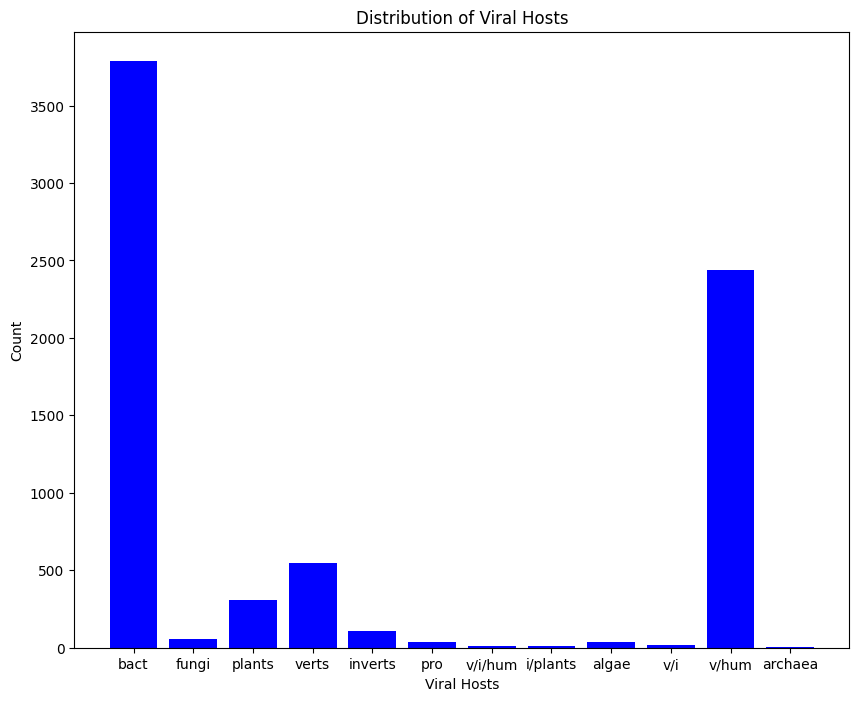

In [8]:
# Plot distribution of viral hosts

import matplotlib.pyplot as plt
%matplotlib inline

group = ['host']
counts = viruses_dropped_nan.groupby(group).size().reset_index(name="Counts")

bars = ('bact', 'fungi', 'plants', 'verts', 'inverts',
        'pro', 'v/i/hum',
        'i/plants', 'algae', 'v/i',
        'v/hum', 'archaea')
y_pos = np.arange(len(bars))

#plt.title('Distribution of Unique Host Types')
plt.figure(figsize=(10,8))
plt.bar(range(len(counts)), counts['Counts'], color = 'blue')
plt.title('Distribution of Viral Hosts')
plt.xlabel('Viral Hosts')
plt.ylabel('Count')
plt.xticks(y_pos, bars)

Number of unique size values:  5233
count    7354.000000
mean        0.051478
std         0.055856
min         0.000174
25%         0.017989
50%         0.033620
75%         0.057983
max         0.497513
Name: size_mb, dtype: float64
mode of Size_Mb is:  0    0.017433
Name: size_mb, dtype: float64
count zeroes is:  0


Text(0, 0.5, 'Count')

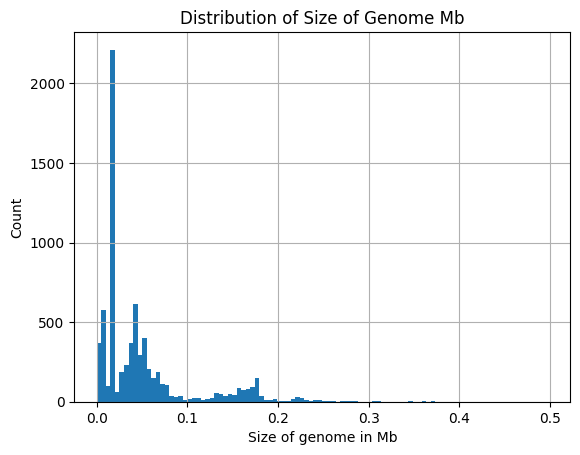

In [9]:
# Get stats for viral genome size (size_mb) and plot distribution

print('Number of unique size values: ', (len(viruses_dropped_nan['size_mb'].unique())))

print(viruses_dropped_nan.size_mb.describe())

print("mode of Size_Mb is: ", viruses_dropped_nan['size_mb'].mode())

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=0, strategy = 'mean')

cleaned_sizemb_df = viruses_dropped_nan['size_mb']

drop_host = viruses_dropped_nan.drop(['host'], axis=1)

imp.fit(drop_host)

cleaned_df = imp.transform(drop_host)

cleaned_df = pd.DataFrame(data=cleaned_df, columns=["size_mb", "gc_percent", "cds"])

cleaned_size = cleaned_df['size_mb']

print("count zeroes is: ", cleaned_size.isin([0]).sum())

cleaned_size = cleaned_size.sort_values()
cleaned_size.hist(bins = 100)
plt.title('Distribution of Size of Genome Mb')
plt.xlabel('Size of genome in Mb')
plt.ylabel('Count')

Number of unique GC% values:  2789
count    7362.000000
mean       43.230327
std        11.971189
min         0.000000
25%        32.370900
50%        39.500000
75%        51.600000
max        78.800000
Name: gc_percent, dtype: float64
Most frequent value is  0    42.2
Name: gc_percent, dtype: float64


Text(0, 0.5, 'Count')

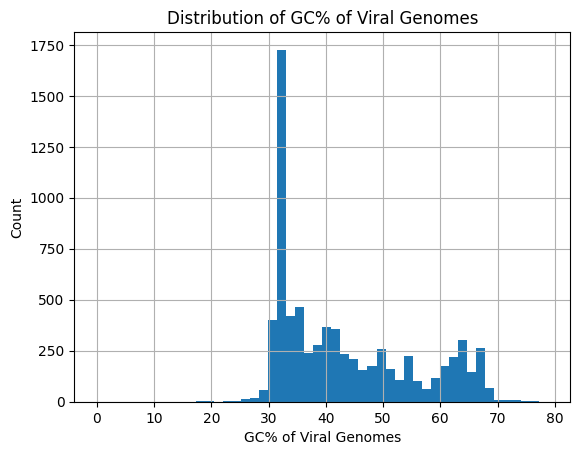

In [10]:
# Get stats for GC% (gc_percent) and plot distribution

print('Number of unique GC% values: ', (len(viruses_df['gc_percent'].unique())))

print(viruses_df.gc_percent.describe())

gc_sorted_df = viruses_df['gc_percent']
gc_sorted_df = gc_sorted_df.sort_values()

print('Most frequent value is ', gc_sorted_df.mode() )
gc_sorted_df.hist(bins = 50)
plt.title('Distribution of GC% of Viral Genomes')
plt.xlabel('GC% of Viral Genomes')
plt.ylabel('Count')

Number of unique CDS values:  363
count    7362.000000
mean       67.090736
std        80.363440
min         0.000000
25%        11.000000
50%        46.000000
75%        90.000000
max       886.000000
Name: cds, dtype: float64
Most frequent value is  0    11
Name: cds, dtype: int64
count zeroes is  32


Text(0, 0.5, 'Count')

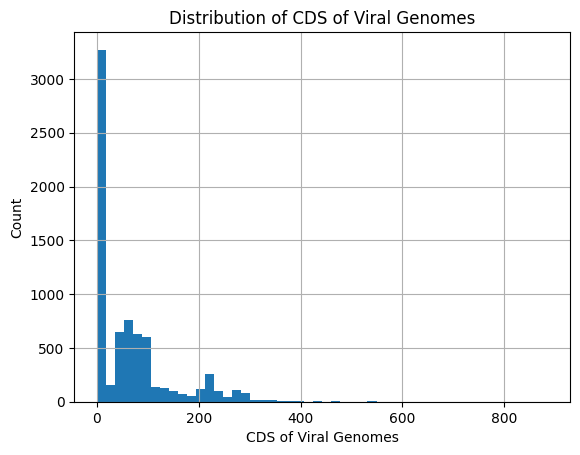

In [11]:
# Get stats for CDS (cds) and plot distribution

print('Number of unique CDS values: ', (len(viruses_df['cds'].unique())))

print(viruses_df.cds.describe())

cds_sorted_df = viruses_df['cds']
cds_sorted_df = cds_sorted_df.sort_values()

print('Most frequent value is ', cds_sorted_df.mode() )

print('count zeroes is ', cds_sorted_df.isin([0]).sum() )

cds_sorted_df.hist(bins = 50)
plt.title('Distribution of CDS of Viral Genomes')
plt.xlabel('CDS of Viral Genomes')
plt.ylabel('Count')

### Pre-process Data


In [12]:
# Pre-process Data

from sklearn import preprocessing

new_viral_df = viruses_dropped_nan.copy()

targets_host = new_viral_df.pop('host')

x = new_viral_df.values

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

unclean_viral_df = pd.DataFrame(x_scaled)

unclean_viral_df.insert(0, 'host', targets_host)

# remove the NaN values!
new_df_clean = unclean_viral_df.dropna()

new_df_clean.columns = ['host', 'size_mb', 'gc_percent', 'cds']
new_df_clean.head(5)

,host,size_mb,gc_percent,cds
0,0.0,0.073089,0.557107,0.060948
1,1.0,0.010327,0.667513,0.002257
2,0.0,0.066560,0.581218,0.057562
3,2.0,0.007142,0.560216,0.002257
4,3.0,0.014095,0.488579,0.007901


In [13]:


# create features and labels
y = new_df_clean['host']
X = new_df_clean.drop(['host'], axis=1)
y.columns = ['host']

X.head(5)

,size_mb,gc_percent,cds
0,0.073089,0.557107,0.060948
1,0.010327,0.667513,0.002257
2,0.066560,0.581218,0.057562
3,0.007142,0.560216,0.002257
4,0.014095,0.488579,0.007901


In [14]:
print(y.unique())

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


### SVC Model - Linear Kernel

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END C=0.1, decision_function_shape=ovo;, score=0.753 total time=   0.5s
[CV 2/5] END C=0.1, decision_function_shape=ovo;, score=0.757 total time=   0.5s
[CV 3/5] END C=0.1, decision_function_shape=ovo;, score=0.748 total time=   0.6s
[CV 4/5] END C=0.1, decision_function_shape=ovo;, score=0.769 total time=   0.6s
[CV 5/5] END C=0.1, decision_function_shape=ovo;, score=0.763 total time=   0.6s
[CV 1/5] END C=0.1, decision_function_shape=ovr;, score=0.753 total time=   0.7s
[CV 2/5] END C=0.1, decision_function_shape=ovr;, score=0.757 total time=   0.7s
[CV 3/5] END C=0.1, decision_function_shape=ovr;, score=0.748 total time=   0.6s
[CV 4/5] END C=0.1, decision_function_shape=ovr;, score=0.769 total time=   0.7s
[CV 5/5] END C=0.1, decision_function_shape=ovr;, score=0.763 total time=   0.7s
[CV 1/5] END ..C=1, decision_function_shape=ovo;, score=0.811 total time=   0.5s
[CV 2/5] END ..C=1, decision_function_shape=ovo;, score=0.806 total time=   0.5s
[CV 3/5] END ..C=1, decision

C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

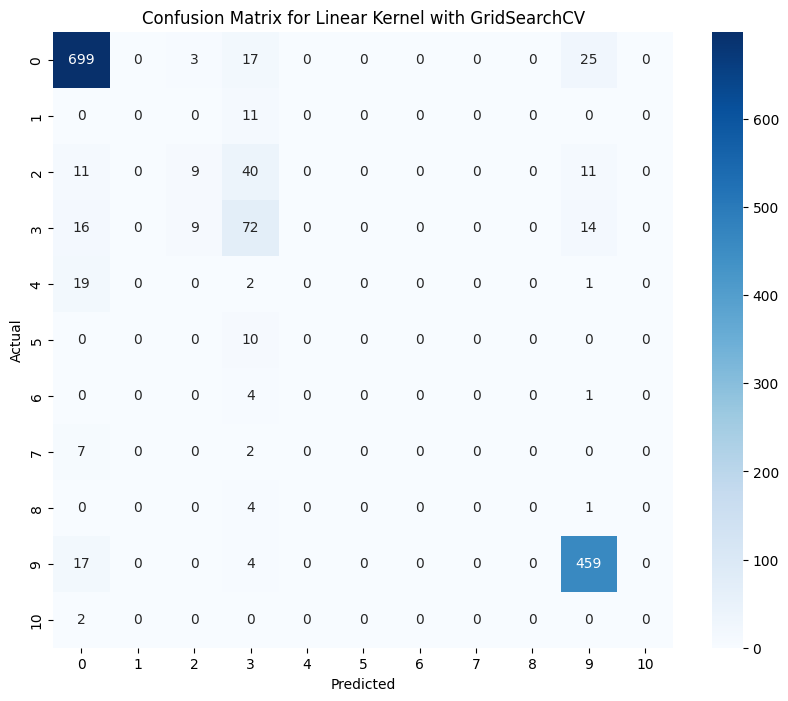

In [16]:

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
# Set up the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'decision_function_shape': ['ovo', 'ovr']
}

# Apply GridSearchCV
grid = GridSearchCV(SVC(kernel='linear'), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Best parameters and estimator
print("Best parameters found: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

# Predictions using the best model
grid_predictions = grid.predict(X_test)

# Retrieve accuracy
accuracy_grid = grid.score(X_test, y_test)
print("Accuracy with GridSearchCV: ", accuracy_grid)

# Confusion matrix
cm_grid = confusion_matrix(y_test, grid_predictions)
print(cm_grid)

# Classification report
print(classification_report(y_test, grid_predictions))

# Confusion matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm_grid, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Linear Kernel with GridSearchCV')
plt.show()


### SVC Model - RBF Kernel


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END C=0.1, decision_function_shape=ovo, gamma=1;, score=0.760 total time=   4.2s
[CV 2/5] END C=0.1, decision_function_shape=ovo, gamma=1;, score=0.771 total time=   4.1s
[CV 3/5] END C=0.1, decision_function_shape=ovo, gamma=1;, score=0.760 total time=   4.0s
[CV 4/5] END C=0.1, decision_function_shape=ovo, gamma=1;, score=0.778 total time=   5.2s
[CV 5/5] END C=0.1, decision_function_shape=ovo, gamma=1;, score=0.773 total time=  11.9s
[CV 1/5] END C=0.1, decision_function_shape=ovo, gamma=0.1;, score=0.720 total time=   9.2s
[CV 2/5] END C=0.1, decision_function_shape=ovo, gamma=0.1;, score=0.713 total time=  22.9s
[CV 3/5] END C=0.1, decision_function_shape=ovo, gamma=0.1;, score=0.714 total time=   5.4s
[CV 4/5] END C=0.1, decision_function_shape=ovo, gamma=0.1;, score=0.741 total time=   5.1s
[CV 5/5] END C=0.1, decision_function_shape=ovo, gamma=0.1;, score=0.730 total time=   4.8s
[CV 1/5] END C=0.1, decision_function_shape=ovo, gamma=0.01;, score=0.518 total time=   5.

C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

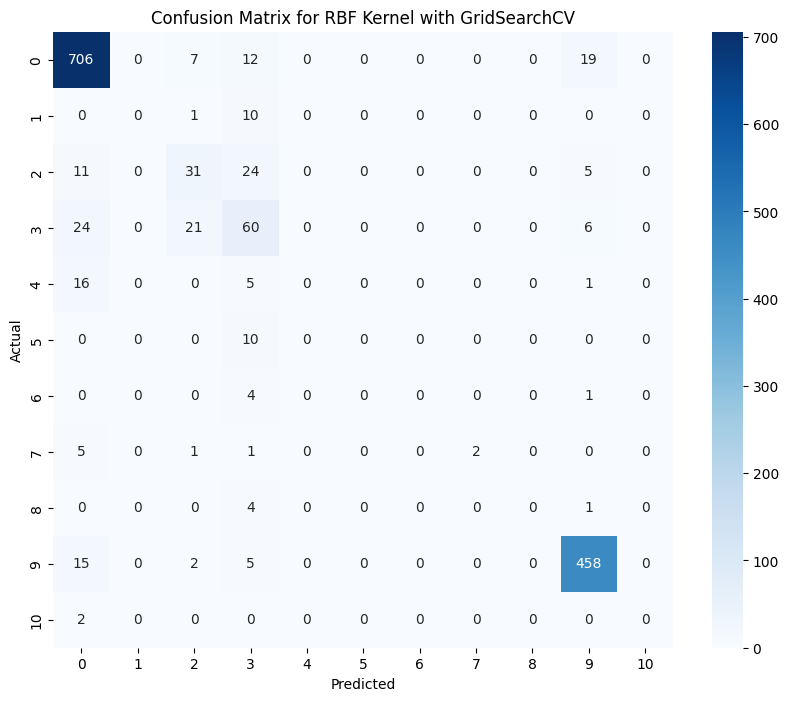

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Set up the parameter grid for RBF kernel
param_grid_rbf = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'decision_function_shape': ['ovo', 'ovr']
}

# Apply GridSearchCV for RBF kernel
grid_rbf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid_rbf, refit=True, verbose=3)
grid_rbf.fit(X_train, y_train)

# Best parameters and estimator for RBF kernel
print("Best parameters found for RBF kernel: ", grid_rbf.best_params_)
print("Best estimator for RBF kernel: ", grid_rbf.best_estimator_)

# Predictions using the best model for RBF kernel
grid_predictions_rbf = grid_rbf.predict(X_test)

# Retrieve accuracy for RBF kernel
accuracy_grid_rbf = grid_rbf.score(X_test, y_test)
print("Accuracy with GridSearchCV for RBF kernel: ", accuracy_grid_rbf)

# Confusion matrix for RBF kernel
cm_grid_rbf = confusion_matrix(y_test, grid_predictions_rbf)
print(cm_grid_rbf)

# Classification report for RBF kernel
print(classification_report(y_test, grid_predictions_rbf))

# Confusion matrix plot for RBF kernel
plt.figure(figsize=(10, 8))
sns.heatmap(cm_grid_rbf, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RBF Kernel with GridSearchCV')
plt.show()


### Random Forest Classifier

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=40;, score=0.926 total time=   0.3s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=40;, score=0.911 total time=   0.3s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=40;, score=0.919 total time=   0.3s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=40;, score=0.927 total time=   0.3s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=40;, score=0.921 total time=   0.3s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.923 total time=   0.4s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.911 total time=   0.4s
[CV 3/5] END max_depth=15, max_features=sqrt, mi

C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

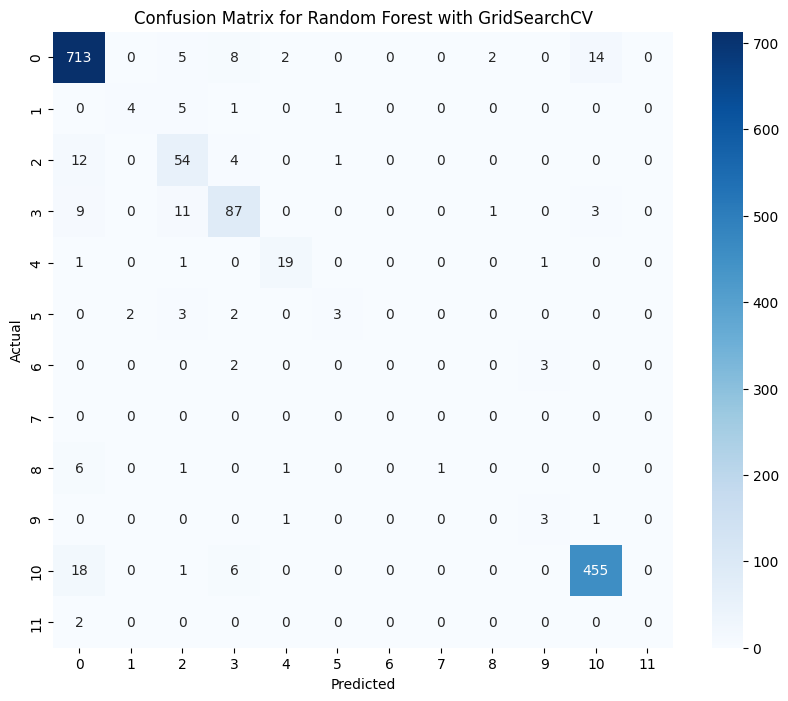

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Set up the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [40, 50, 60, 70, 80],
    'max_depth': [15, 20, 25],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [4, 6]
}

# Apply GridSearchCV for Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, refit=True, verbose=3)
grid_rf.fit(X_train, y_train)

# Best parameters and estimator for Random Forest
print("Best parameters found for Random Forest: ", grid_rf.best_params_)
print("Best estimator for Random Forest: ", grid_rf.best_estimator_)

# Predictions using the best model for Random Forest
grid_predictions_rf = grid_rf.predict(X_test)

# Retrieve accuracy for Random Forest
accuracy_grid_rf = grid_rf.score(X_test, y_test)
print("Accuracy with GridSearchCV for Random Forest: ", accuracy_grid_rf)

# Confusion matrix for Random Forest
cm_grid_rf = confusion_matrix(y_test, grid_predictions_rf)
print('confusion-matrix')
print(cm_grid_rf)

# Classification report for Random Forest
print(classification_report(y_test, grid_predictions_rf))

# Confusion matrix plot for Random Forest
plt.figure(figsize=(10, 8))
sns.heatmap(cm_grid_rf, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest with GridSearchCV')
plt.show()


## Decision tree classifier

Decision Tree Classifier
acc decision tree:  0.8775510204081632
confusion-matrix
[[695   1   8  13   7   1   0   0   2   0  17   0]
 [  0   4   5   2   0   0   0   0   0   0   0   0]
 [ 13   0  48   7   1   1   0   0   0   0   1   0]
 [ 18   2  12  68   2   0   0   0   1   0   8   0]
 [  1   0   2   1  16   0   0   0   1   1   0   0]
 [  2   2   1   2   0   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   2   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   1   0   1   0   0   1   2   0   0   0]
 [  0   0   0   0   1   0   0   0   0   3   1   0]
 [ 23   1   0   7   0   0   0   0   0   0 449   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       744
         1.0       0.40      0.36      0.38        11
         2.0       0.62      0.68      0.65        71
         3.0       0.68      0.61      0.64       111
         4.0       0.57      0.73  

C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

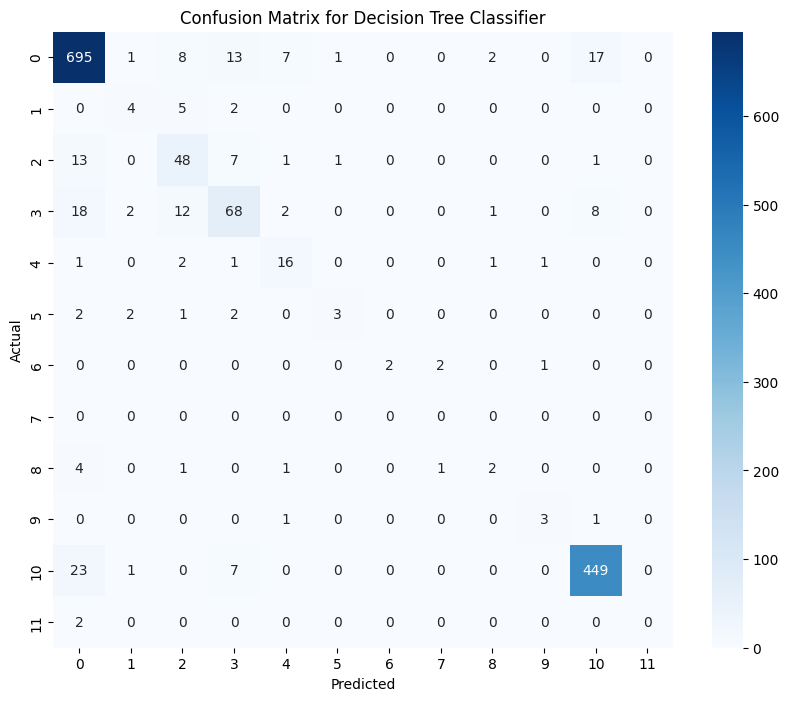

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.881 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.892 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.885 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5;, score=0.897 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5;, score=0.901 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5;, 

C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV 4/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5;, score=0.891 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10;, score=0.901 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10;, score=0.902 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10;, score=0.894 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10;, score=0.894 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10;, score=0.895 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2;, score=0.889 total time=   0.0s
[CV 2/5] END max_depth=None

C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I.V.SRICHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

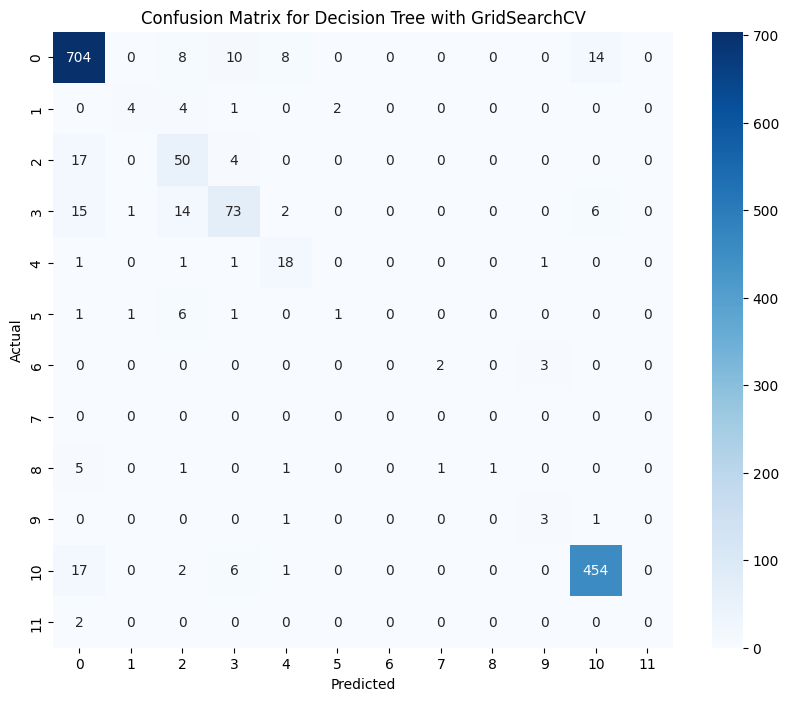

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initial Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print('Decision Tree Classifier')

accuracy_dt = dt.score(X_test, y_test)
print("acc decision tree: ", accuracy_dt)

cm_dt = confusion_matrix(y_test, dt_pred)
print('confusion-matrix')
print(cm_dt)

print(classification_report(y_test, dt_pred))

# Confusion matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Set up the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Apply GridSearchCV for Decision Tree
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid_dt, refit=True, verbose=3)
grid_dt.fit(X_train, y_train)

# Best parameters and estimator for Decision Tree
print("Best parameters found for Decision Tree: ", grid_dt.best_params_)
print("Best estimator for Decision Tree: ", grid_dt.best_estimator_)

# Predictions using the best model for Decision Tree
grid_predictions_dt = grid_dt.predict(X_test)

# Retrieve accuracy for Decision Tree
accuracy_grid_dt = grid_dt.score(X_test, y_test)
print("Accuracy with GridSearchCV for Decision Tree: ", accuracy_grid_dt)

# Confusion matrix for Decision Tree
cm_grid_dt = confusion_matrix(y_test, grid_predictions_dt)
print('confusion-matrix')
print(cm_grid_dt)

# Classification report for Decision Tree
print(classification_report(y_test, grid_predictions_dt))

# Confusion matrix plot for Decision Tree
plt.figure(figsize=(10, 8))
sns.heatmap(cm_grid_dt, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree with GridSearchCV')
plt.show()


In [20]:
# from sklearn.model_selection import cross_val_score

# clf_cross_val = svm.SVC(kernel='rbf', C=1, decision_function_shape='ovo')

# scores = cross_val_score(clf_cross_val, X, y, cv=10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))